# Avaliação técnica - Gabriel Negrelli

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Leitura e condicionamento dos dados

Primeiro, eh realizada a leitura dos dados disponibilizados no [kaggle](https://www.kaggle.com/uciml/electric-power-consumption-data-set). Os campos preenchidos com o valor `?` sao considerados como sendo `NaN`. As colunas contendo a data e o horario das medidas sao unidos em uma soh coluna e interpretados como sendo do tipo`pandas.datetime`.

In [55]:
df = pd.read_csv('./electric-power-consumption-data-set/household_power_consumption.txt', sep=';', 
                 na_values='?', parse_dates=[['Date', 'Time']])

Em seguida, as colunas sao renomeadas para melhor compreensao dos dados contidos no dataset. Alem disso, a coluna contendo os horarios das medidas eh utilizada como indice do dataframe.

In [66]:
columns = {
    'Date_Time': 'Timestamp',
    'Global_active_power': 'P [kW]', 
    'Global_reactive_power': 'Q [kW]', 
    'Voltage': 'V [V]', 
    'Global_intensity': 'I [A]', 
    'Sub_metering_1': 'P_kitchen [Wh]', 
    'Sub_metering_2': 'P_laundry [Wh]', 
    'Sub_metering_3': 'P_heat [Wh]'
}

df.rename(columns=columns, inplace=True)

In [67]:
df.set_index('Timestamp', inplace=True)

KeyError: 'Timestamp'

Finalmente, sao criadas as segintes colunas com base nos dados presentes no dataset:

* P_rest [Wh]: Energia (em Wh) consumida no restante da casa.

* P [Wh]: Energia (em Wh) consumida na residencia.

* Q [Wh]: Energia reativa (em Wh) consumida na residencia.

* fp: fator de potencia em cada instante.

O dataframe resultante pode ser visto abaixo

In [85]:
df['P_rest [Wh]'] = df['P [kW]']*1000/60 - df['P_kitchen [Wh]'] - df['P_laundry [Wh]'] - df['P_heat [Wh]']
df['P [Wh]'] = df['P [kW]']*1000/60
df['Q [Wh]'] = df['Q [kW]']*1000/60
df['fp'] = df['P [Wh]']/np.sqrt(df['P [Wh]']**2 + df['Q [Wh]']**2)

In [68]:
df.head()

,P [kW],Q [kW],V [V],I [A],P_kitchen [Wh],P_laundry [Wh],P_heat [Wh],P_rest [Wh],P [Wh],Q [Wh],fp
Timestamp,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667,70.266667,6.966667,0.995121
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333,89.333333,7.266667,0.996708
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667,89.566667,8.300000,0.995734
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000,89.800000,8.366667,0.995688
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000,61.100000,8.800000,0.989787


***

## Analise dos dados de consumo

In [86]:
minute_mean = df['P [kW]'].groupby([df.index.hour, df.index.minute]).mean().to_dict()
hourly_mean = df['P [kW]'].groupby(df.index.hour).mean().to_dict()
daily_mean = df['P [kW]'].groupby(df.index.day).mean().to_dict()
week_mean = df['P [kW]'].groupby(df.index.weekday).mean().to_dict()
monthly_mean = df['P [kW]'].groupby(df.index.month).mean().to_dict()
yearly_mean = df['P [kW]'].groupby(df.index.year).mean().to_dict()

In [28]:
qminute_mean = df['Q [kW]'].groupby([df.index.hour, df.index.minute]).mean().to_dict()
qhourly_mean = df['Q [kW]'].groupby(df.index.hour).mean().to_dict()
qdaily_mean = df['Q [kW]'].groupby(df.index.day).mean().to_dict()
qweek_mean = df['Q [kW]'].groupby(df.index.weekday).mean().to_dict()
qmonthly_mean = df['P_heat [Wh]'].groupby(df.index.month).mean().to_dict()
qyearly_mean = df['Q [kW]'].groupby(df.index.year).mean().to_dict()

In [11]:
measures = [minute_mean[time] for time in sorted(minute_mean.keys())]
instants = [':'.join(map(str, k)) for k in sorted(minute_mean.keys())]

([<matplotlib.axis.XTick at 0x7f96f4d28c10>,
 <a list of 7 Text xticklabel objects>)

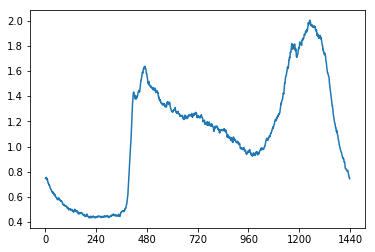

In [78]:
plt.plot(measures)
plt.xticks(np.arange(0, 1441, 4*60))

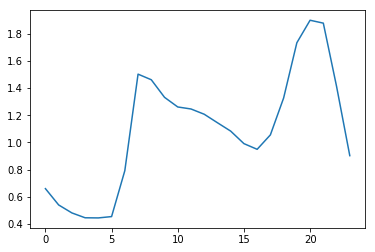

In [15]:
plt.plot(hourly_mean.values())

<BarContainer object of 7 artists>

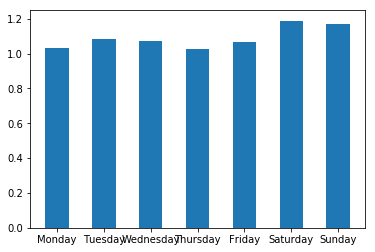

In [84]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.bar(weekdays, week_mean.values(), width=0.5)

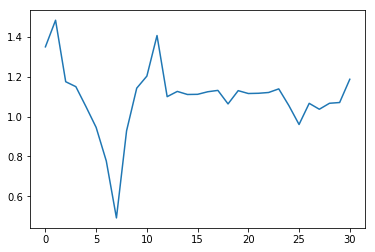

In [17]:
plt.plot(daily_mean.values())

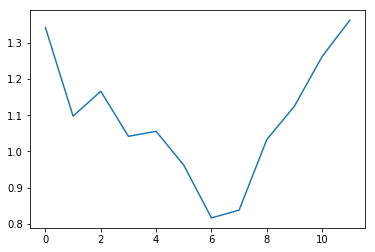

In [23]:
plt.plot(monthly_mean.values())

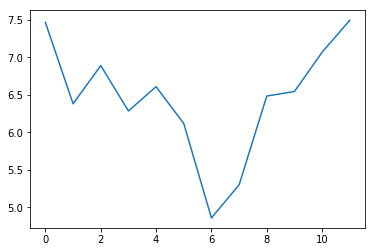

In [35]:
plt.plot(qmonthly_mean.values())